In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [20]:
#reading data from wine.csv file
data = pd.read_csv(r"Wine.csv")
X = data.iloc[:,0:13]
y = data.iloc[:,13]

In [71]:
#feature selection using Lasso
pipeline = Pipeline([ ('scaler', StandardScaler()), ('model', Lasso()) ])
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,10,0.1)}, scoring='neg_mean_squared_error', cv=5)
search.fit(X,y)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
features = X.columns
selected_features = features[importance>0]
dropped_features = features[importance==0]
X_final = X.drop(dropped_features, axis = 'columns')


In [89]:
# forming 2 classifiers

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

#forming VotingClassifier using Logistic regression, Naive bayes and RandomForest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

estimator = []
estimator.append(('LR', LogisticRegression(solver='lbfgs', random_state=42, multi_class='multinomial', verbose=3)))
estimator.append(("Naive_Bayes", GaussianNB()))
estimator.append(('RFC', RandomForestClassifier(max_depth=500, criterion ='gini', n_estimators =100, random_state=42 )))
estimator.append(('SVC', SVC(probability=True )))

V_classifier = VotingClassifier(estimators =estimator, voting='hard')

#forming DecisionTreeClassifier

DT_classifier  = DecisionTreeClassifier(splitter='best', criterion='gini')


In [83]:
#excluding bias from data using NearMiss
from imblearn.under_sampling import NearMiss
NM = NearMiss()
X_final, y_final = NM.fit_resample(X_train, y_train.ravel())
print(X_final) 

#splitting training and testing data
X_train, X_test, y_train,y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


    Ash_Alcanity  Flavanoids   Hue  OD280  Proline
0           15.5        2.64  1.18   2.69     1020
1           17.2        2.69  1.23   2.87      990
2           25.0        2.68  1.13   3.20      830
3           16.0        3.17  1.04   3.44     1065
4           19.4        2.97  1.25   3.40      915
..           ...         ...   ...    ...      ...
61          21.5        1.39  0.57   1.33      550
62          21.0        0.92  0.56   1.58      520
63          22.5        0.47  0.78   1.75      520
64          23.5        0.52  0.89   2.06      520
65          25.0        0.60  0.82   1.69      515

[66 rows x 5 columns]


In [84]:
#Principle Component Analysis feature reduction
pca = PCA(n_components=2)
X_train_final = pca.fit_transform(X_train)
X_test_final = pca.transform(X_test)
print(X_train_final)
explained_variance = pca.explained_variance_ratio_


[[-2.29292119e+02  1.08358434e+01]
 [-3.53548359e+01  1.08111826e+00]
 [ 3.15656735e+02  1.17611765e+00]
 [ 4.00689846e+02  5.11610099e+00]
 [-2.84413132e+02 -6.81904792e+00]
 [ 2.95671517e+02  3.34048013e+00]
 [ 3.55636388e+02 -1.08770403e+00]
 [-8.93477096e+01  1.74786488e+00]
 [ 1.65635118e+02 -1.06653315e+00]
 [-5.43936829e+01 -2.89910038e+00]
 [-2.54366543e+02  8.98343345e-01]
 [ 4.40669176e+02  2.20219501e+00]
 [-1.49378351e+02 -6.86094489e-01]
 [-1.89396538e+02 -2.87789448e+00]
 [-1.69363435e+02  1.48640198e+00]
 [-7.43585582e+01  1.74744311e+00]
 [-1.42362714e+02  7.23787277e-01]
 [-9.37659089e+00 -7.38279214e-01]
 [-2.29391796e+02 -2.05535592e+00]
 [ 5.35644132e+02 -1.21422600e+00]
 [-6.93783283e+01 -1.42465951e+00]
 [-3.93458970e+01  2.42774065e+00]
 [ 1.20620973e+02 -1.63968036e+00]
 [-5.43595981e+01  1.60393120e+00]
 [ 3.15660224e+02  1.57490139e+00]
 [-1.69378059e+02 -1.06700989e+00]
 [-1.99376048e+02 -3.16749259e-01]
 [-2.93808205e+01 -1.07334919e+00]
 [-2.54381747e+02 -1

In [90]:
#training and predicting using Voting_Classifier
V_classifier.fit(X_train_final, y_train)
y_VC_predict = V_classifier.predict(X_test_final)
VC_results = classification_report(y_VC_predict, y_test)
print(VC_results)


              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       0.67      0.25      0.36         8
           3       0.20      0.50      0.29         2

    accuracy                           0.50        14
   macro avg       0.51      0.58      0.48        14
weighted avg       0.60      0.50      0.48        14



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [91]:
#training and predicting using DecisionTreeClassifier
DT_classifier.fit(X_train_final, y_train)
y_DT_predict = DT_classifier.predict(X_test_final)
DT_results = classification_report(y_DT_predict, y_test)
print(DT_results)



              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.33      0.33      0.33         3
           3       0.60      0.60      0.60         5

    accuracy                           0.71        14
   macro avg       0.64      0.64      0.64        14
weighted avg       0.71      0.71      0.71        14



In [94]:
#checking the relation between predictions of voting classifier and DecisiontreeClassifier
from sklearn.metrics import accuracy_score
accuracy_VC_DT = accuracy_score(y_DT_predict,y_VC_predict)
print(accuracy_VC_DT)

0.6428571428571429


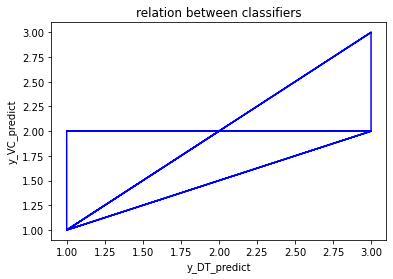

In [98]:
import matplotlib.pyplot as plt
plt.plot(y_DT_predict,y_VC_predict,color='blue')
plt.title("relation between classifiers")
plt.xlabel("y_DT_predict")
plt.ylabel("y_VC_predict")
plt.show()
